# <center> Thyroid Detection and Analysis</center>

In [1]:
import numpy as np 
import pandas as pd
from seaborn import heatmap, pairplot
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Introduction
This project is used to analyse the Thyroid dataset and detect if a person has Hyperhytorid, Hypothyroid or nothing.

# Sections
- Data Engineering
- Exploratory Data Analysis
- Estimating NaN values
- Machine learning for identifying the Thyroid patients

# Data descriptions

- age - age of the patient (int)
- sex - sex patient identifies (str)
- on_thyroxine - whether patient is on thyroxine (bool)
- query on thyroxine - whether patient is on thyroxine (bool)
- on antithyroid meds - whether patient is on antithyroid meds (bool)
- sick - whether patient is sick (bool)
- pregnant - whether patient is pregnant (bool)
- thyroid_surgery - whether patient has undergone thyroid surgery (bool)
- I131_treatment - whether patient is undergoing I131 treatment (bool)
- query_hypothyroid - whether patient believes they have hypothyroid (bool)
- query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
- lithium - whether patient lithium (bool)
- goitre - whether patient has goitre (bool)
- tumor - whether patient has tumor (bool)
- hypopituitary - whether patient hyperpituitary gland (float)
- psych - whether patient psych (bool)
- TSH_measured - whether TSH was measured in the blood (bool)
- TSH - TSH level in blood from lab work (float)
- T3_measured - whether T3 was measured in the blood (bool)
- T3 - T3 level in blood from lab work (float)
- TT4_measured - whether TT4 was measured in the blood (bool)
- TT4 - TT4 level in blood from lab work (float)
- T4U_measured - whether T4U was measured in the blood (bool)
- T4U - T4U level in blood from lab work (float)
- FTI_measured - whether FTI was measured in the blood (bool)
- FTI - FTI level in blood from lab work (float)
- TBG_measured - whether TBG was measured in the blood (bool)
- TBG - TBG level in blood from lab work (float)
- referral_source - (str)
- target - hyperthyroidism medical diagnosis (str)
- patient_id - unique id of the patient (str)

 The diagnosis consists of a string of letters indicating diagnosed conditions.
    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of
    comments.

    Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones

In [2]:
df = pd.read_csv("thyroidDF.csv").drop("patient_id", axis=1)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29,F,f,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,-
2,41,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,-
3,36,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,-
4,32,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


In [3]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

# Data Engineering

In [5]:
# Ages greater than 400 which are the outliers or some other mistake in inserting data.
df[df.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
2976,455,F,f,f,f,f,f,f,f,f,...,t,118.0,t,1.13,t,104.0,f,NaN,SVI,-
5710,65511,M,f,f,f,f,f,f,f,f,...,t,113.0,t,1.08,t,104.0,f,NaN,other,-
6392,65512,M,f,f,f,f,f,f,f,f,...,t,112.0,t,0.84,t,133.0,f,NaN,other,-
8105,65526,F,f,f,f,f,f,f,f,f,...,t,132.0,t,1.02,t,129.0,f,NaN,other,-


In [6]:
df.drop(["TBG", 'referral_source'], axis=1, inplace=True)  # As the TBG column has more than 90% missing data we drop it.
df.drop(df[df.age > 100].index, inplace=True)

# Converting the age feature to numeric.
df.age = pd.to_numeric(df.age)
df.rename({"query_hyperthyroid":"Hyperthyroid", "query_hypothyroid":"Hypothyroid"}, axis=1, inplace=True)

# Exploratory Data Analysis

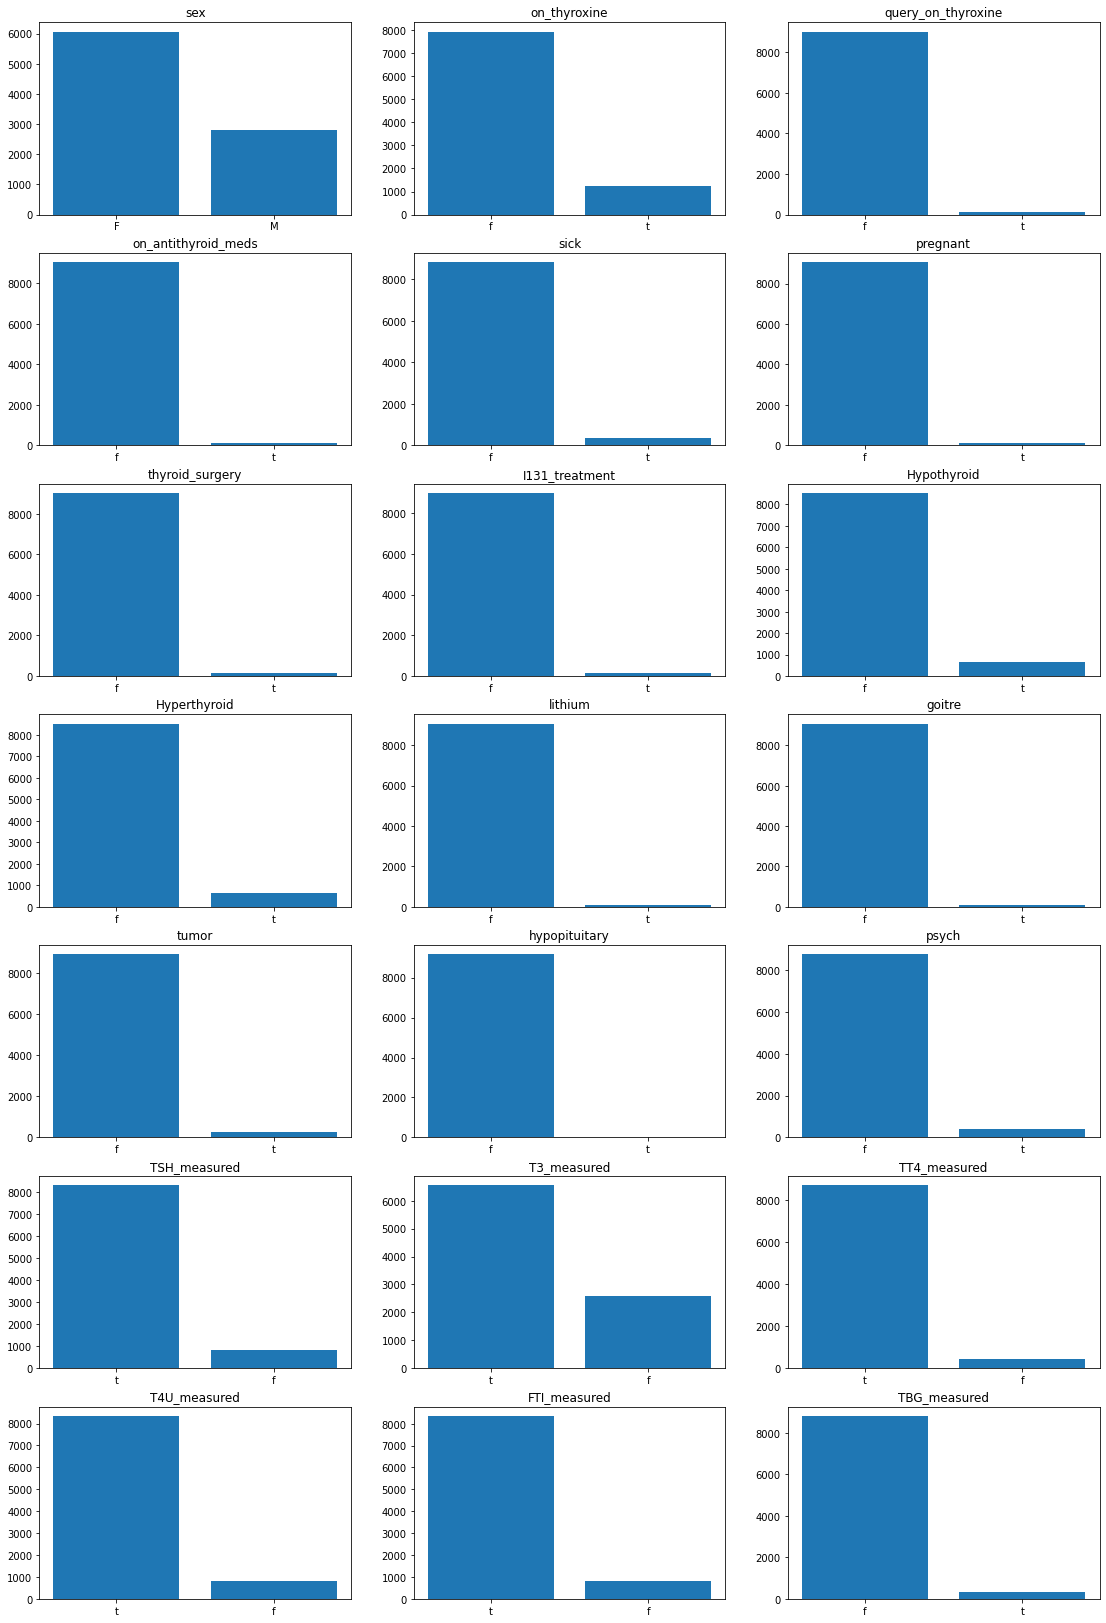

In [7]:
cat = df.select_dtypes("object")
cols = cat.columns[:-1]
plt.figure(figsize=(19,29))
for i in range(1, len(cols)+1):
    plt.subplot(7, 3, i)
    plt.title(cols[i-1])
    plt.bar(cat.iloc[:, i-1].value_counts().index, cat.iloc[:, i-1].value_counts().values)

- We can see that the ratio of true by false value is very low in most of the categorical variables except on_thyroxine feature.

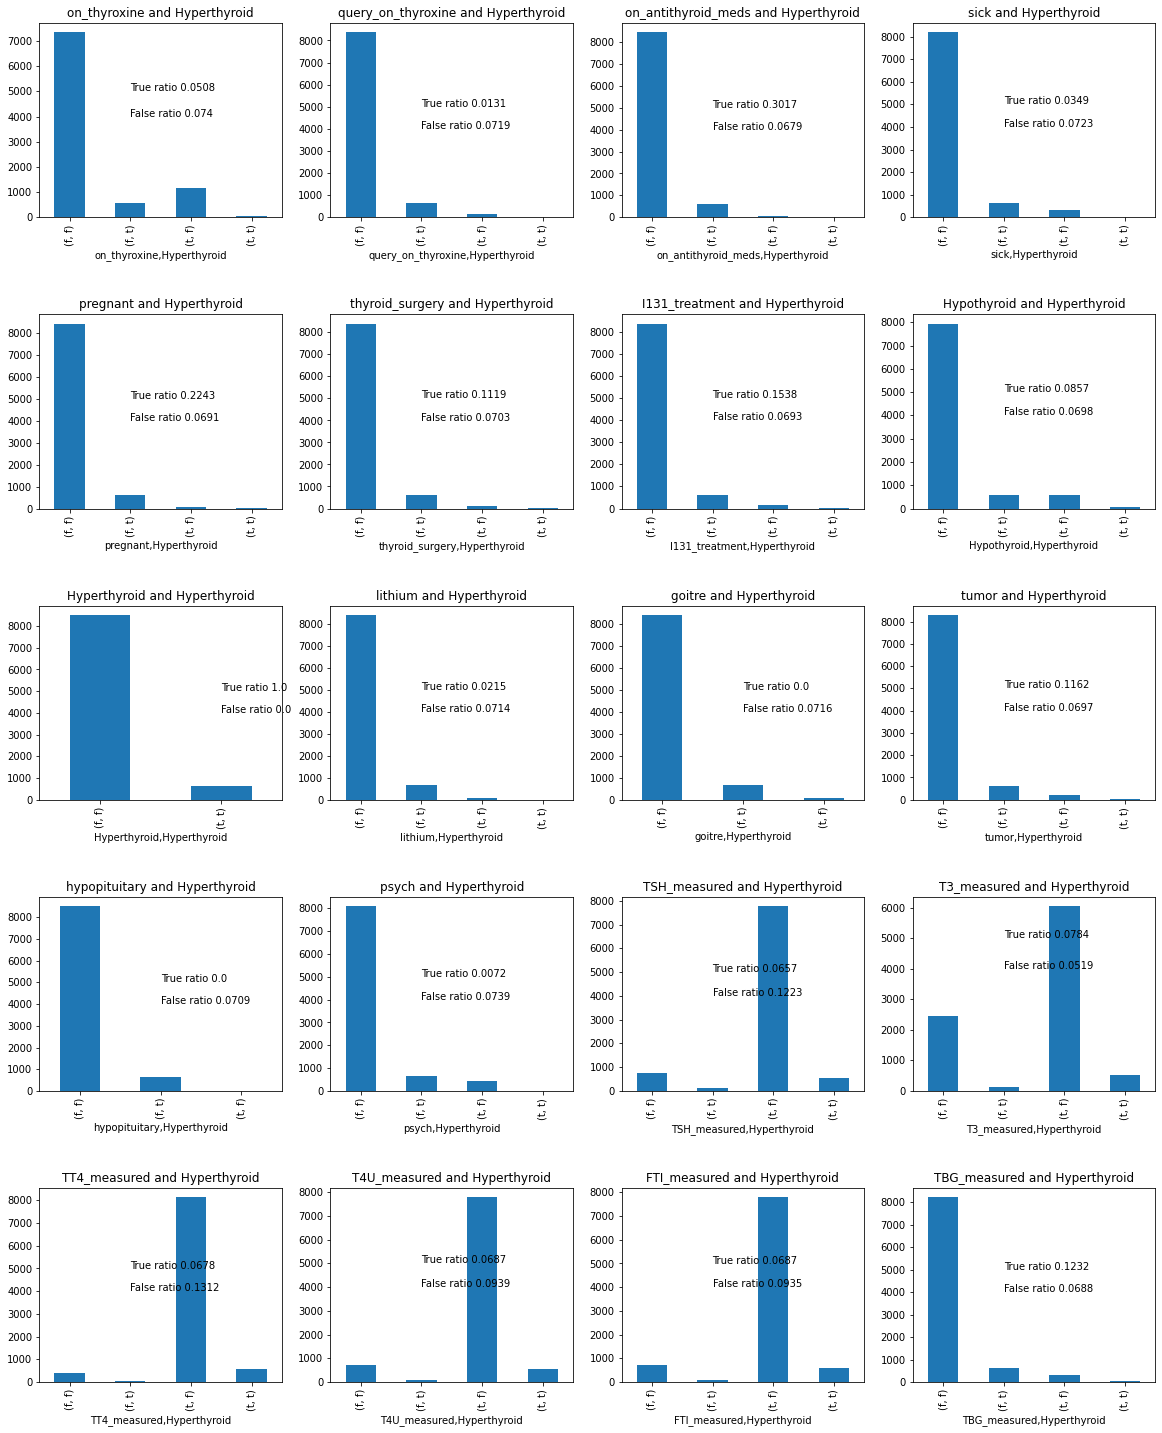

In [8]:
fig, axs = plt.subplots(5, 4, figsize= (20, 25))
fig.subplots_adjust(hspace=0.5)
cols = np.array(cat.columns[1:-1]).reshape((5, 4))
for i in range(len(axs)):
    for j in range(len(axs[0])):
        true_rat = len(cat[(cat.loc[:, cols[i][j]] == 't') & (cat.Hyperthyroid == 't')]) / len(cat[cat.loc[:, cols[i][j]] == 't'])
        false_rat = len(cat[(cat.loc[:, cols[i][j]] == 'f') & (cat.Hyperthyroid == 't')]) / len(cat[cat.loc[:, cols[i][j]] == 'f'])
        axs[i, j].set_title(cols[i][j]+" and Hyperthyroid")
        fig = cat.groupby([cols[i][j], "Hyperthyroid"]).size().plot(kind='bar', ax=axs[i, j])
        fig.text(1, 5000, "True ratio "+ str(round(true_rat, 4)))
        fig.text(1, 4000, "False ratio "+ str(round(false_rat, 4))) 

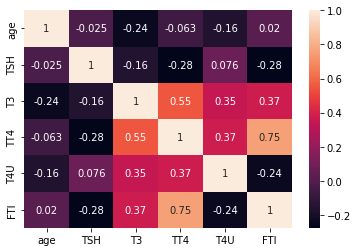

In [9]:
heatmap(df.corr(), annot=True);

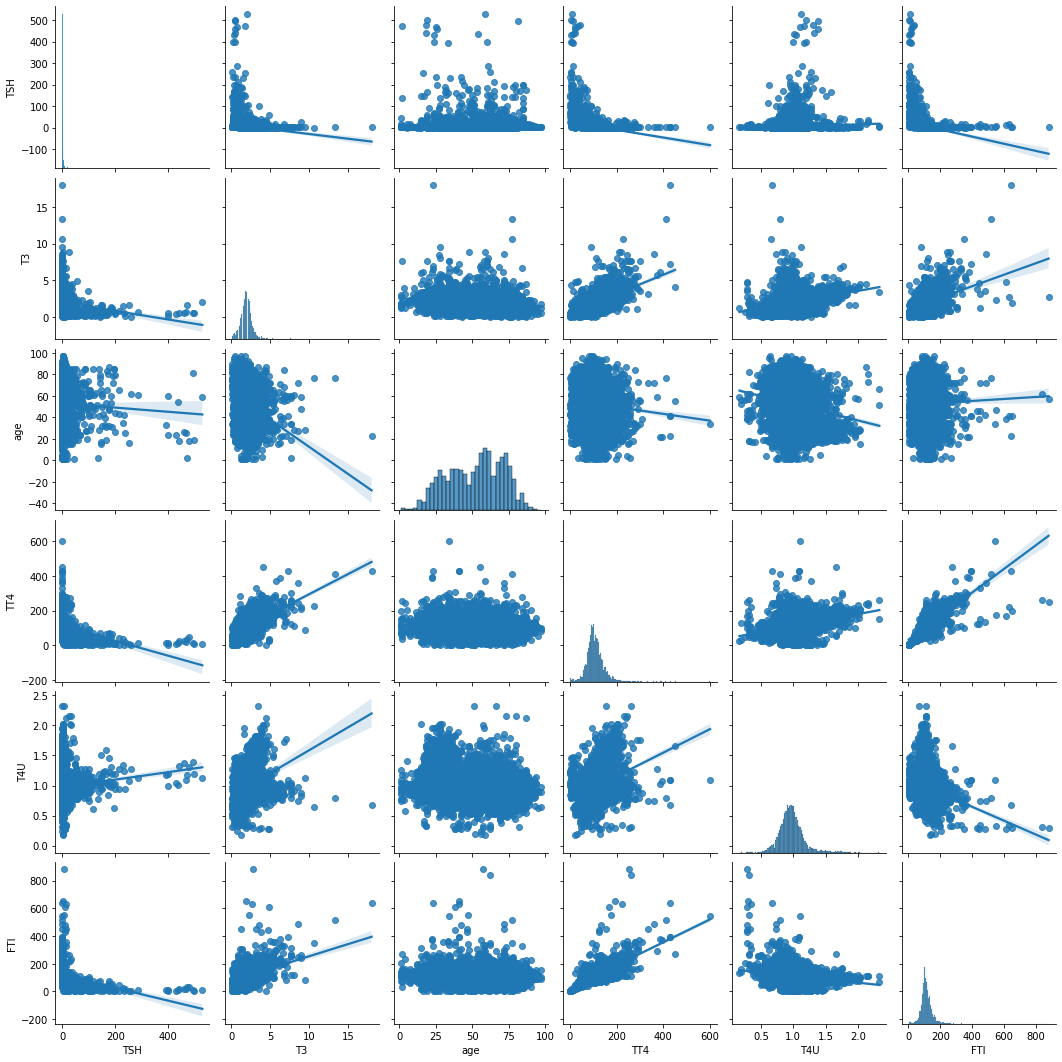

In [10]:
sns.pairplot(df[['TSH', 'T3', 'age', 'TT4', 'T4U', "FTI"]], kind='reg');

- From the above plot and calculation we can say that the women with pregnancy have more chances of Thyroid as compared to the women who don't.
- T3 and TT4 are highly correlated.
- Psychic symptoms are highly correlated to Thyroid.
- TT4 and T4U are highly positively correlated.
- FTI and TT4 are higly correlated.

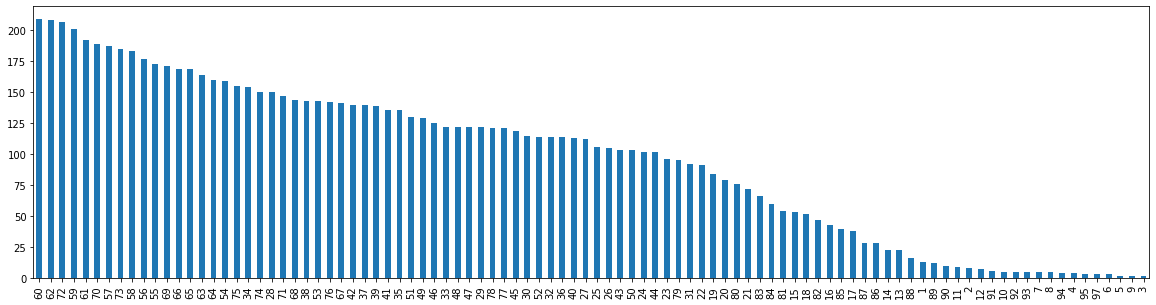

In [11]:
plt.figure(figsize=(20, 5))
df.age.value_counts().plot(kind='bar');

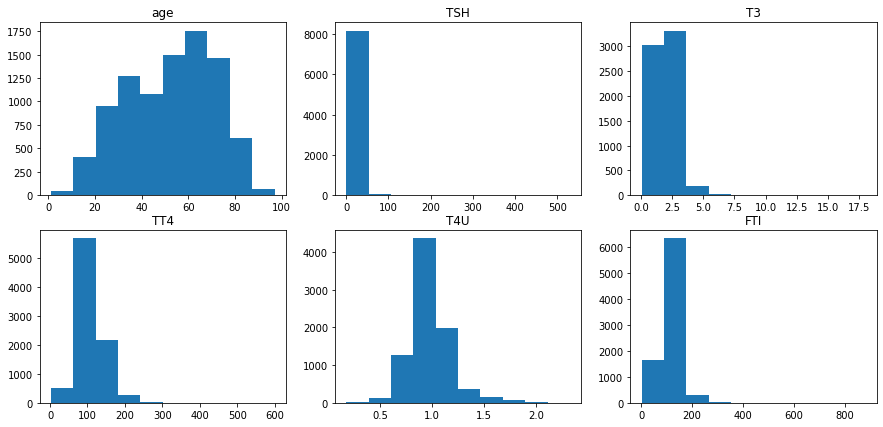

In [12]:
numeric = df.select_dtypes(exclude="object")
num_cols = np.array(numeric.columns).reshape(2, 3)
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
for r in range(len(axs)):
    for c in range(len(axs[0])):
        col = num_cols[r][c]
        axs[r, c].set_title(col)
        axs[r, c].hist(numeric.loc[:, col])

### Observations
- Age, TT4, T4U are nearly normally distributed.
- TSH, T3, and FTI are rightly skewed.
- Looks like we've all the values of age in the range 1 to 97.

### Correlating Numeric features with Hyperthyroid.

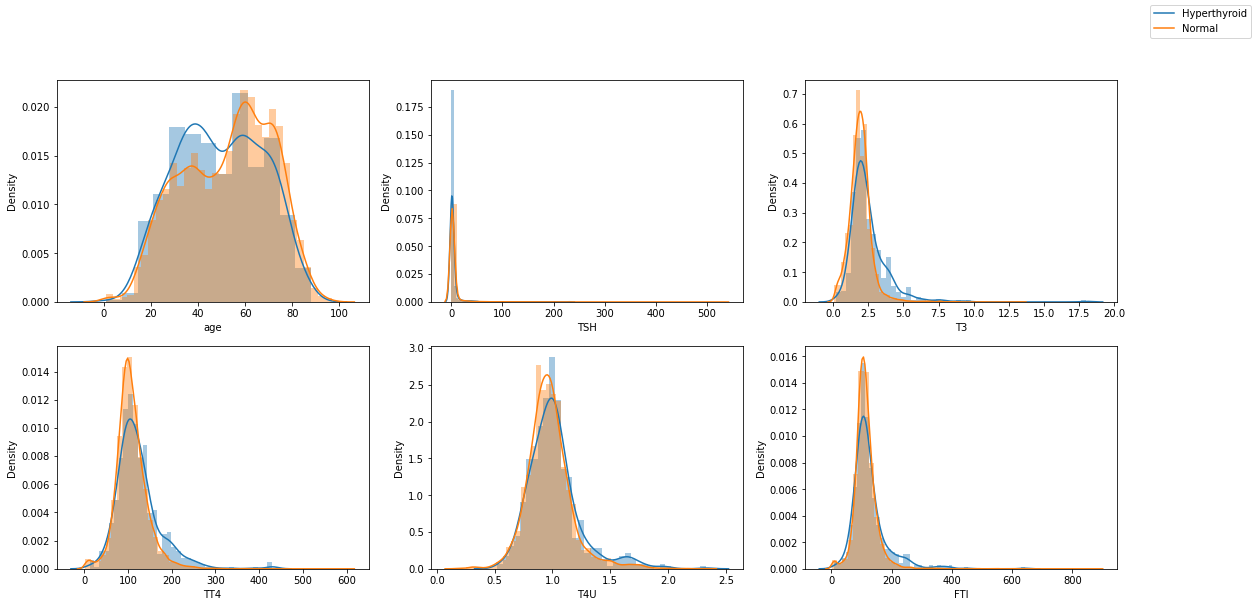

In [13]:
f, ax = plt.subplots(2, 3, figsize = (19,9) )
for r in range(len(ax)):
    for c in range(len(ax[0])):
        col = num_cols[r][c]
        sns.distplot( df[df.Hyperthyroid == 't'][col], ax = ax[r, c])  
        sns.distplot(df[df.Hyperthyroid == 'f'][col], ax = ax[r, c])  
f.legend(labels=["Hyperthyroid", "Normal"])
f.show()

- We've more people with no Thyroid in TSH feature.
- In age feature the people with Hyperthyroid are densly populated in the age range of 40-60 and Normal people are populated between 60-75.

### Correlating Numeric features with Hypothyroid.

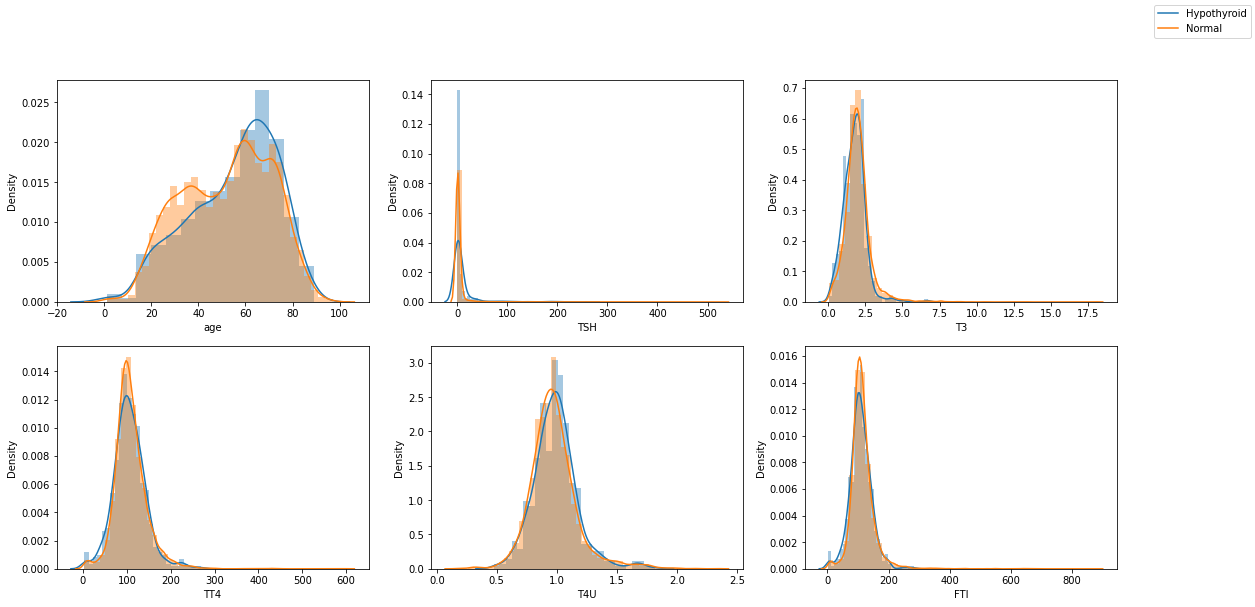

In [14]:
f, ax = plt.subplots(2, 3, figsize = (19,9) )
for r in range(len(ax)):
    for c in range(len(ax[0])):
        col = num_cols[r][c]
        sns.distplot( df[df.Hypothyroid == 't'][col], ax = ax[r, c])  
        sns.distplot(df[df.Hypothyroid == 'f'][col], ax = ax[r, c])  
f.legend(labels=["Hypothyroid", "Normal"])
f.show()

- In the age feature the data is more deviated in Thyroid cases compared to normal cases.
- Conversly to the age feature, in the TT4, TSH, and T3 feature the data is more has more deviated in Normal cases than the Thyroid cases.
- In T4U the data is normally distributed in both the cases.

# Estimating NaN values

In [15]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

T3                     0.283922
TSH                    0.091841
T4U                    0.088242
FTI                    0.087478
TT4                    0.048211
sex                    0.033486
age                    0.000000
TBG_measured           0.000000
FTI_measured           0.000000
T4U_measured           0.000000
TT4_measured           0.000000
T3_measured            0.000000
TSH_measured           0.000000
psych                  0.000000
hypopituitary          0.000000
tumor                  0.000000
goitre                 0.000000
lithium                0.000000
Hyperthyroid           0.000000
Hypothyroid            0.000000
I131_treatment         0.000000
thyroid_surgery        0.000000
pregnant               0.000000
sick                   0.000000
on_antithyroid_meds    0.000000
query_on_thyroxine     0.000000
on_thyroxine           0.000000
target                 0.000000
dtype: float64

The following features have missing values
- TSH with 0.091841% missing values.
- Sex with 0.033486% missing values.
- T3 with 0.283922% missing values.
- TT4 with 0.048211% missing values.
- T4U with 0.088242% missing values.
- FTI with 0.087478% missing values.


In [16]:
print("TSH is correlated with " + df.corr()['TSH'].sort_values(ascending=False).index[1], df.corr()['TSH'].sort_values(ascending=False).values[1])
print("T4U is correlated with " + df.corr()['T4U'].sort_values(ascending=False).index[1], df.corr()['T4U'].sort_values(ascending=False).values[1])
print("TT4 is correlated with " + df.corr()['TT4'].sort_values(ascending=False).index[1], df.corr()['TT4'].sort_values(ascending=False).values[1])
print("FTI is correlated with " + df.corr()['FTI'].sort_values(ascending=False).index[1], df.corr()['FTI'].sort_values(ascending=False).values[1])
print("T3 is correlated with " + df.corr()['T3'].sort_values(ascending=False).index[1], df.corr()['T3'].sort_values(ascending=False).values[1])

TSH is correlated with T4U 0.07587949469098336
T4U is correlated with TT4 0.3687556673762031
TT4 is correlated with FTI 0.7512177377940507
FTI is correlated with TT4 0.7512177377940507
T3 is correlated with TT4 0.5504050565489408


In [17]:
def replace_na(col, cor_col):
    cormean = df[df[cor_col] == df[df[col].isna()][cor_col].mode().sum()][col].mean()
    df[col].fillna(cormean, inplace=True)
replace_na("TSH", "T4U")
replace_na("T4U", "TT4")
replace_na("FTI", "TT4")
replace_na("T3", "TT4")
replace_na("TT4", "FTI")

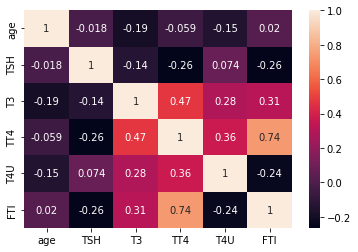

In [18]:
heatmap(df.corr(), annot=True);

### Creating 2 different dataframes representing Hyperthyroid and Hypotheroid

In [19]:
d = df.dropna()
hypo = d.drop(["Hyperthyroid", 'target'], axis=1)
hyper = d.drop(["Hypothyroid", 'target'], axis=1)

In [20]:
for col in cat.drop("target",axis=1).columns:
    cat.loc[:, col].replace
hyperdf = pd.get_dummies(hyper, columns=cat.drop(["Hypothyroid", 'target', "Hyperthyroid"], axis=1).columns)
hypodf = pd.get_dummies(hypo, columns=cat.drop(["Hyperthyroid", 'target', "Hypothyroid"], axis=1).columns)

## Model building

## Predicting Hyperthyroid

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
hyperdf.Hyperthyroid.replace({"f":0, "t":1}, inplace=True)
hypodf.Hypothyroid.replace({"f":0, "t":1}, inplace=True)

In [23]:
hypo_x, hypo_y = hypodf.drop("Hypothyroid", axis=1), hypodf.Hypothyroid
hyper_x, hyper_y = hyperdf.drop("Hyperthyroid", axis=1), hyperdf.Hyperthyroid

hyperX_train, hyperX_test, hypery_train, hypery_test = train_test_split(hyper_x, hyper_y, test_size=0.2,train_size=0.8, random_state=20)
hypoX_train, hypoX_test, hypoy_train, hypoy_test = train_test_split(hypo_x, hypo_y, test_size=0.2, train_size=0.8, random_state=20)

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [24]:
Kmeans = KMeans(n_clusters=2, max_iter=5000).fit(hyperX_train, hypery_train)
preds = Kmeans.predict(hyperX_test)
print(Kmeans)
print("F1 score:", f1_score(hypery_test, preds))

pd.crosstab(hypery_test, preds)

KMeans(max_iter=5000, n_clusters=2)
F1 score: 0.13620071684587812


col_0,0,1
Hyperthyroid,,
0,1253,397
1,85,38


In [25]:
Logreg = LogisticRegression().fit(hyperX_train, hypery_train)
preds = Logreg.predict(hyperX_test)
print(Logreg)
print("F1 score:", f1_score(hypery_test, preds))

pd.crosstab(hypery_test, preds)

LogisticRegression()
F1 score: 0.04580152671755726


col_0,0,1
Hyperthyroid,,
0,1645,5
1,120,3


In [26]:
LR = LinearRegression().fit(hyperX_train, hypery_train)
preds = LR.predict(hyperX_test)
preds = np.array([1 if i>0.1 else 0 for i in preds ])

print(LR)
print("F1 Score:", f1_score(hypery_test, preds))

pd.crosstab(hypery_test, preds)

LinearRegression()
F1 Score: 0.2226148409893993


col_0,0,1
Hyperthyroid,,
0,1270,380
1,60,63


In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=1000).fit(hyperX_train, hypery_train)
preds = mlp.predict(hyperX_test)
print(mlp)
print("F1 score:", f1_score(hypery_test, preds))
pd.crosstab(hypery_test, preds)

MLPClassifier(max_iter=1000, random_state=1)
F1 score: 0.07407407407407408


col_0,0,1
Hyperthyroid,,
0,1643,7
1,118,5


- As Logistic regression is failing to fit the data it shows that the data is non-linear for which KMeans does the bst job.
- One of the reason of the lower accuracy is that the data is highly biased.

In [28]:
import statsmodels.api as sm
import numpy as np
X = sm.add_constant(hyperX_train)
model = sm.OLS(hypery_train, X)
results = model.fit()
preds = [1 if i>0.15 else 0 for i in np.sum(results.params*hyperX_test, axis=1)]
print("Ordinary Least Squares")
print("F1 score:", f1_score(preds, hypery_test))
pd.crosstab(preds, hypery_test)

Ordinary Least Squares
F1 score: 0.2510121457489879


Hyperthyroid,0,1
row_0,,
0,1557,92
1,93,31


In [29]:
results.params.sort_values(ascending=False)[:24]

on_antithyroid_meds_t    0.105423
I131_treatment_t         0.054400
pregnant_t               0.051960
goitre_f                 0.050056
T3                       0.042738
psych_f                  0.039447
TT4_measured_f           0.037033
TSH_measured_f           0.036517
query_on_thyroxine_f     0.036188
FTI_measured_t           0.035486
thyroid_surgery_t        0.030606
hypopituitary_t          0.030262
on_thyroxine_f           0.025949
T3_measured_t            0.022131
tumor_t                  0.021717
sex_F                    0.017259
T4U_measured_f           0.016440
sick_f                   0.015754
lithium_f                0.011148
T4U                      0.010790
TBG_measured_f           0.008317
const                    0.007412
FTI                      0.000666
TSH                      0.000227
dtype: float64

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hyperthyroid   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     19.09
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           4.25e-82
Time:                        13:54:20   Log-Likelihood:                -259.66
No. Observations:                7088   AIC:                             571.3
Df Residuals:                    7062   BIC:                             749.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0074      0.013      0.567      0.571      -0.018       0.033
age                      -0.0002      0.000     -1.242      0.214      -0.001       0.000
TSH                       0.0002      0.000      1.581      0.114   -5.45e-05       0.001
T3                        0.0427      0.005      8.874      0.000       0.033       0.052
TT4                      -0.0002      0.000     -0.576      0.565      -0.001       0.000
T4U                       0.0108      0.037      0.291      0.771      -0.062       0.084
FTI                       0.0007      0.000      2.325      0.020       0.000       0.001
sex_F                     0.0173      0.007      2.326      0.020       0.003       0.032
sex_M                    -0.0098      0.007     -1.353      0.176      -0.024       0.004
on_thyroxine_f            0.0259      0.008      3.288      0.001       0.010       0.041
on_thyroxine_t           -0.0185      0.008     -2.301      0.021      -0.034      -0.003
query_on_thyroxine_f      0.0362      0.013      2.713      0.007       0.010       0.062
query_on_thyroxine_t     -0.0288      0.013     -2.156      0.031      -0.055      -0.003
on_antithyroid_meds_f    -0.0980      0.014     -7.003      0.000      -0.125      -0.071
on_antithyroid_meds_t     0.1054      0.015      6.950      0.000       0.076       0.135
sick_f                    0.0158      0.010      1.569      0.117      -0.004       0.035
sick_t                   -0.0083      0.011     -0.778      0.437      -0.029       0.013
pregnant_f               -0.0445      0.015     -2.920      0.004      -0.074      -0.015
pregnant_t                0.0520      0.017      3.062      0.002       0.019       0.085
thyroid_surgery_f        -0.0232      0.013     -1.731      0.083      -0.049       0.003
thyroid_surgery_t         0.0306      0.015      2.107      0.035       0.002       0.059
I131_treatment_f         -0.0470      0.012     -3.765      0.000      -0.071      -0.023
I131_treatment_t          0.0544      0.014      4.021      0.000       0.028       0.081
lithium_f                 0.0111      0.016      0.689      0.491      -0.021       0.043
lithium_t                -0.0037      0.018     -0.213      0.831      -0.038       0.031
goitre_f                  0.0501      0.016      3.135      0.002       0.019       0.081
goitre_t                 -0.0426      0.017     -2.459      0.014      -0.077      -0.009
tumor_f                  -0.0143      0.011     -1.280      0.201      -0.036       0.008
tumor_t                   0.0217      0.012      1.824      0.068      -0.002       0.045
hypopituitary_f          -0.0229      0.120     -0.190      0.849      -0.259       0.213
hypopituitary_t           0.0303      0.132      0.229      0.819      -0.229       0.290
psych_f                

## Predicting Hypothyroid

In [31]:
Kmeans = KMeans(n_clusters=2, max_iter=5000).fit(hypoX_train, hypoy_train)
preds = Kmeans.predict(hypoX_test)
print(Kmeans)
print("F1 score:", f1_score(hypoy_test, preds))

pd.crosstab(hypoy_test, preds)

KMeans(max_iter=5000, n_clusters=2)
F1 score: 0.1075268817204301


col_0,0,1
Hypothyroid,,
0,1245,405
1,93,30


In [32]:
Logreg = LogisticRegression().fit(hypoX_train, hypoy_train)
preds = Logreg.predict(hypoX_test)
print(Logreg)
print("F1 score:", f1_score(hypoy_test, preds))

pd.crosstab(hypoy_test, preds)

LogisticRegression()
F1 score: 0.0


col_0,0
Hypothyroid,
0,1650
1,123


In [33]:
LR = LinearRegression().fit(hypoX_train, hypoy_train)
preds = LR.predict(hypoX_test)
preds = np.array([1 if i>0.1 else 0 for i in preds ])

print(LR)
print("F1 score:", f1_score(hypoy_test, preds))

pd.crosstab(hypoy_test, preds)

LinearRegression()
F1 score: 0.19480519480519484


col_0,0,1
Hypothyroid,,
0,1356,294
1,78,45


In [34]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=500, random_state=1, max_iter=10000).fit(hypoX_train, hypoy_train)
preds = mlp.predict(hypoX_test)
print(mlp)
print("F1 score:", f1_score(hypoy_test, preds))
pd.crosstab(hypoy_test, preds)

MLPClassifier(hidden_layer_sizes=500, max_iter=10000, random_state=1)
F1 score: 0.03870967741935485


col_0,0,1
Hypothyroid,,
0,1621,29
1,120,3


- As Logistic regression is failing to fit the data it shows that the data is non-linear for which KMeans does the bst job.
- One of the reason of the lower accuracy is that the data is highly biased.

In [35]:
X = sm.add_constant(hypoX_train)
model = sm.OLS(hypoy_train, X)
results = model.fit()
preds = [1 if i>0.15 else 0 for i in np.sum(results.params*hypoX_test, axis=1)]
print("Ordinary Least Squares")
print("F1 score:", f1_score(preds, hypoy_test))
pd.crosstab(preds, hypoy_test)

Ordinary Least Squares
F1 score: 0.13229571984435798


Hypothyroid,0,1
row_0,,
0,1533,106
1,117,17


In [36]:
results.params.sort_values(ascending=False)[:15]

FTI_measured_f           0.053302
TBG_measured_f           0.049371
T4U_measured_t           0.041663
on_thyroxine_t           0.039639
TT4_measured_f           0.031056
pregnant_f               0.026515
on_antithyroid_meds_f    0.026106
I131_treatment_t         0.023203
tumor_f                  0.017111
hypopituitary_f          0.016768
sex_F                    0.016457
goitre_f                 0.015382
TSH_measured_t           0.014714
psych_f                  0.012414
T3_measured_f            0.009671
dtype: float64

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Hypothyroid   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9.511
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           6.79e-36
Time:                        13:54:26   Log-Likelihood:                -250.79
No. Observations:                7088   AIC:                             553.6
Df Residuals:                    7062   BIC:                             732.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0008      0.013     -0.064      0.949      -0.026       0.025
age                       0.0003      0.000      1.879      0.060   -1.35e-05       0.001
TSH                       0.0005      0.000      3.628      0.000       0.000       0.001
T3                       -0.0094      0.005     -1.956      0.050      -0.019    1.99e-05
TT4                    5.024e-05      0.000      0.168      0.867      -0.001       0.001
T4U                       0.0064      0.037      0.174      0.862      -0.066       0.079
FTI                      -0.0003      0.000     -0.977      0.329      -0.001       0.000
sex_F                     0.0165      0.007      2.221      0.026       0.002       0.031
sex_M                    -0.0173      0.007     -2.378      0.017      -0.032      -0.003
on_thyroxine_f           -0.0405      0.008     -5.134      0.000      -0.056      -0.025
on_thyroxine_t            0.0396      0.008      4.926      0.000       0.024       0.055
query_on_thyroxine_f      0.0041      0.013      0.311      0.756      -0.022       0.030
query_on_thyroxine_t     -0.0050      0.013     -0.373      0.709      -0.031       0.021
on_antithyroid_meds_f     0.0261      0.014      1.868      0.062      -0.001       0.054
on_antithyroid_meds_t    -0.0269      0.015     -1.778      0.075      -0.057       0.003
sick_f                   -0.0085      0.010     -0.850      0.395      -0.028       0.011
sick_t                    0.0077      0.011      0.718      0.473      -0.013       0.029
pregnant_f                0.0265      0.015      1.740      0.082      -0.003       0.056
pregnant_t               -0.0273      0.017     -1.614      0.107      -0.061       0.006
thyroid_surgery_f         0.0079      0.013      0.592      0.554      -0.018       0.034
thyroid_surgery_t        -0.0088      0.015     -0.604      0.546      -0.037       0.020
I131_treatment_f         -0.0240      0.012     -1.928      0.054      -0.048       0.000
I131_treatment_t          0.0232      0.014      1.717      0.086      -0.003       0.050
lithium_f                 0.0093      0.016      0.573      0.567      -0.022       0.041
lithium_t                -0.0101      0.018     -0.576      0.565      -0.044       0.024
goitre_f                  0.0154      0.016      0.965      0.335      -0.016       0.047
goitre_t                 -0.0162      0.017     -0.936      0.349      -0.050       0.018
tumor_f                   0.0171      0.011      1.533      0.125      -0.005       0.039
tumor_t                  -0.0179      0.012     -1.509      0.131      -0.041       0.005
hypopituitary_f           0.0168      0.120      0.139      0.889      -0.219       0.253
hypopituitary_t          -0.0176      0.132     -0.133      0.894      -0.277       0.242
psych_f                

# Conclusions
- The data is mostly imbalanced towards non-thyroid cases.
- Thyroid disease is mostly found in Women.
- Thyroid disease mostly occur Women in postpartum or after menopause period.
- The dataset has many features with False values compared to True values.

# Citations
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
- https://my.clevelandclinic.org/health/diseases/8541-thyroid-disease
- https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
- https://www.healthline.com/health/hypothyroidism/hypothyroidism-vs-hyperthyroidism